In [ ]:
from pathlib import Path
import tensorflow as tf
import sys

In [ ]:
project_path = Path(__file__).parent.parent
img_dataset_path = project_path / "data" / "imgs"
model_label = "vgg16"

In [ ]:
sys.path.append(project_path)
from finetune_service import fine_tune

In [8]:
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.VGG16(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights="imagenet"
)
base_model_layer_name = base_model.name
last_conv_layer_name = "block5_conv3"

In [9]:
preprocess_input = tf.keras.applications.vgg16.preprocess_input

Found 13957 files belonging to 2 classes.
Found 2826 files belonging to 2 classes.
Found 1088 files belonging to 2 classes.
Start training classifier
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 186ms/step - accuracy: 0.4947 - auc_2: 0.5316 - loss: 4.5942
initial loss: 4.59
initial accuracy: 0.49
initial auc: 0.53
Epoch 1/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 98s 212ms/step - accuracy: 0.5723 - auc_2: 0.5935 - loss: 2.8313 - val_accuracy: 0.7360 - val_auc_2: 0.8039 - val_loss: 0.7193
Epoch 2/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 93s 213ms/step - accuracy: 0.6256 - auc_2: 0.6698 - loss: 1.8686 - val_accuracy: 0.8110 - val_auc_2: 0.8903 - val_loss: 0.4604
Epoch 3/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 96s 219ms/step - accuracy: 0.6784 - auc_2: 0.7412 - loss: 1.3188 - val_accuracy: 0.8620 - val_auc_2: 0.9340 - val_loss: 0.3382
Epoch 4/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 91s 208ms/step - accuracy: 0.7136 - auc_2: 0.7896 - loss: 1.0022 - val_accuracy: 0.8935 - val_auc_2: 0.9555 - val_loss: 0.2732
Epoch 5/10
437/437 ━━━━━━━━━━━

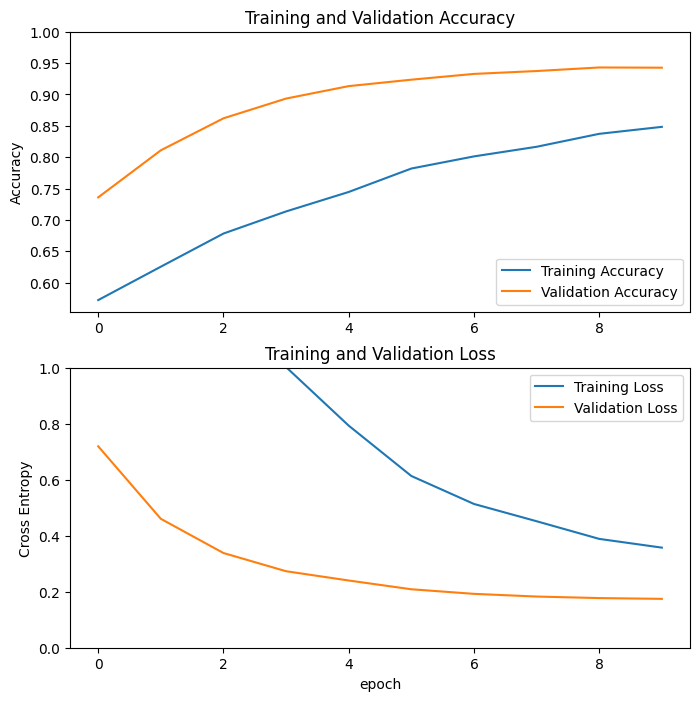

Let's select the best checkpoint based on accuracy:
model_epoch_01.keras      | Test: 0.5965 | Val: 0.7360 | Gap: 0.1395
model_epoch_02.keras      | Test: 0.6351 | Val: 0.8110 | Gap: 0.1759
model_epoch_03.keras      | Test: 0.6489 | Val: 0.8620 | Gap: 0.2131
model_epoch_04.keras      | Test: 0.6443 | Val: 0.8935 | Gap: 0.2492
model_epoch_05.keras      | Test: 0.6517 | Val: 0.9133 | Gap: 0.2617
model_epoch_06.keras      | Test: 0.7004 | Val: 0.9236 | Gap: 0.2232
model_epoch_07.keras      | Test: 0.7243 | Val: 0.9328 | Gap: 0.2085
model_epoch_08.keras      | Test: 0.7381 | Val: 0.9374 | Gap: 0.1993
model_epoch_09.keras      | Test: 0.7546 | Val: 0.9430 | Gap: 0.1884
model_epoch_10.keras      | Test: 0.7463 | Val: 0.9427 | Gap: 0.1964

Best checkpoint: model_epoch_09.keras with test accuracy = 0.7546
Start finetuning classifier
Number of layers in the base model:  19
Number of trainable variables in the model:  8
Epoch 11/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 120s 258ms/step - accuracy: 0.8832 

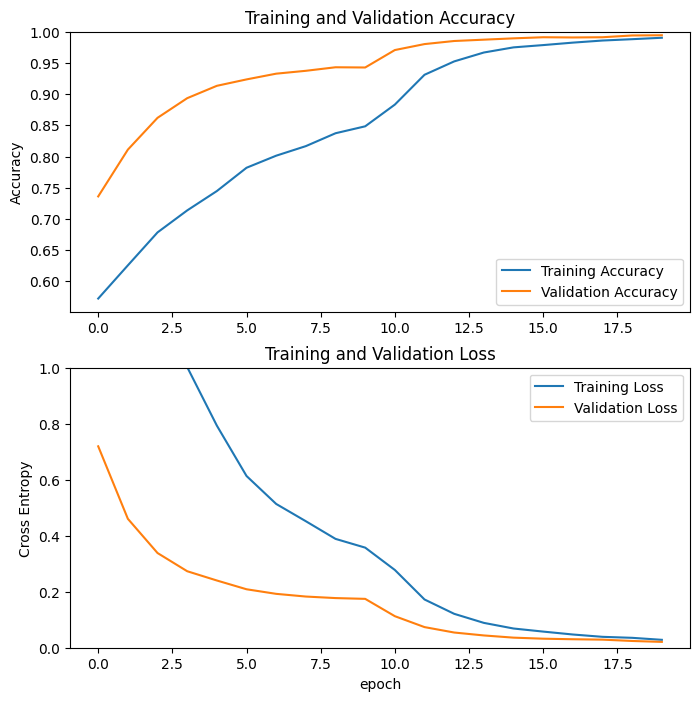

Let's select the best checkpoint based on accuracy:
model_epoch_11.keras      | Test: 0.8042 | Val: 0.9706 | Gap: 0.1664
model_epoch_12.keras      | Test: 0.7785 | Val: 0.9802 | Gap: 0.2017
model_epoch_13.keras      | Test: 0.7583 | Val: 0.9851 | Gap: 0.2269
model_epoch_14.keras      | Test: 0.7436 | Val: 0.9873 | Gap: 0.2437
model_epoch_15.keras      | Test: 0.7169 | Val: 0.9894 | Gap: 0.2725
model_epoch_16.keras      | Test: 0.7188 | Val: 0.9912 | Gap: 0.2724
model_epoch_17.keras      | Test: 0.7142 | Val: 0.9908 | Gap: 0.2766
model_epoch_18.keras      | Test: 0.7142 | Val: 0.9912 | Gap: 0.2770
model_epoch_19.keras      | Test: 0.7105 | Val: 0.9940 | Gap: 0.2835
model_epoch_20.keras      | Test: 0.7022 | Val: 0.9943 | Gap: 0.2921

Best checkpoint: model_epoch_11.keras with test accuracy = 0.8042


In [ ]:
fine_tune(
    train_path=img_dataset_path / "training",
    val_path=img_dataset_path / "validation",
    test_path=img_dataset_path / "testing",
    batch_size=32,
    img_size=IMG_SIZE,
    base_model=base_model,
    base_model_layer_name=base_model_layer_name,
    pre_process=preprocess_input,
    dropout=0.6,
    lr_classifier=10e-5,
    epochs_classifier=10,
    cp_path=project_path / "cp",
    fine_tune_at=15,
    lr_finetune=10e-7,
    epochs_finetune=10,
    model_save_path=project_path,
    last_conv_layer_name=last_conv_layer_name,
)